In [1]:
# Ignore future warning andprint('Percent of missing "Cabin" records is {}'.format((df['Cabin'].isnull().sum()/df.shape[0])*100)) depreciation
def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning)
    warnings.filterwarnings('ignore', category = FutureWarning)

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# save file path, read train data, preview train data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Train data exploration
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Observation: 
# There are 12 fields and 891 observations in the train set
# Survival rate is 0.38
# Age, Cabin, Embarked have some missing values
# Name is diverse-many different ways of writing name, some people have "nickname'. Name may reveal nationality or social class,
# Ticket have  many different name formats and may reveal some relation to other features
# In the scope of this project andfor simplicity, I will not include Passenger ID, Name, Ticket in the model
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
# Exploring remaining features: Pclass, Sex, Age, SibSp, Parch, Fare, Cabin
# Check missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# First, deal with missing data of Age, Cabin and Embarked 
# Then further explore other columns

In [10]:
# Missing Age data
print('Percent of missing "Age" records is {}%'.format(round(df['Age'].isnull().sum() / df.shape[0] * 100, 2)))

Percent of missing "Age" records is 19.87%


Text(0.5, 1.0, 'Age')

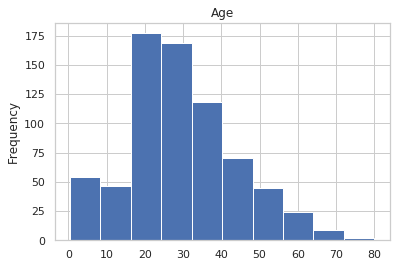

In [11]:
# Plot Age data
df['Age'].plot(kind = 'hist')
plt.title('Age')

In [12]:
# Because Age is right skewed, we won't use average but use median value to fill in 
# Age median value 
median_age = df['Age'].median(skipna= True)
print('The median age is {}'.format(median_age))

The median age is 28.0


In [13]:
# Fill in median age 
df['Age'].fillna(median_age, inplace = True)
df['Age'].isnull().sum()

0

In [14]:
# Missing Embark data
print('Percent of missing "Embark" records is {}%'.format(df['Embarked'].isnull().sum() / df.shape[0] * 100))


Percent of missing "Embark" records is 0.22446689113355783%


In [15]:
# Missing Embark data
print('Percent There are only a few missing Embark data, we will fill in with the most popular location')

Percent There are only a few missing Embark data, we will fill in with the most popular location


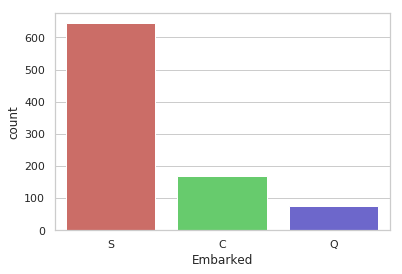

<Figure size 432x288 with 0 Axes>

In [16]:
# Embarked data plot
sns.countplot(x = 'Embarked', data =  df, palette = 'hls')
plt.show()
plt.savefig('count_plot Embarked')

In [17]:
# S is the most popular location, we will fill in the missing value with S
df['Embarked'].fillna('S', inplace = True)
df['Embarked'].isnull().sum()

0

In [18]:
# Missing Cabin data
print('Percent of missing "Cabin" records is {}%'.format(round(df['Cabin'].isnull().sum() / df.shape[0] * 100, 2)))

Percent of missing "Cabin" records is 77.1%


In [19]:
# Due to high percentage of missing value of Cabin, we will drop Cabin  

In [20]:
# Survival Data exploration:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

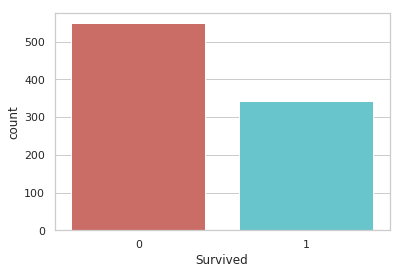

<Figure size 432x288 with 0 Axes>

In [21]:
# Data exploration plot
sns.countplot(x = 'Survived', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot survival')

In [22]:
# Percentage of survived vs not survived
count_not_sv = len(df[df['Survived'] == 0])
count_sv = len(df[df['Survived'] == 1])
pct_sv = count_sv/(count_sv + count_not_sv)
pct_not_sv = count_not_sv/(count_sv + count_not_sv)
print('Percentage of SURVIVE is {}%'.format(round((pct_sv * 100),2)))
print('Percentage of NOT SURVIVE is {}%'.format(round((pct_not_sv * 100),2)))

Percentage of SURVIVE is 38.38%
Percentage of NOT SURVIVE is 61.62%


In [23]:
# Thus the ratio of survive to not survive is approximately 2:3

In [24]:
# Mean of two sets
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.028233,0.553734,0.329690,22.117887
1,1.950292,28.291433,0.473684,0.464912,48.395408


In [25]:
# Observation:
# Average Pclass ( 1st Upper, 2nd  Middle, 3rd Lower) of people who survived is lower than those who didn't survive
# This means "higher" social class is more likely to survive. However, this might also be because there are more people 
# in the "lower" social class in the data set, causing them to represent more in a category. Therefore, 
# we need to count and see how many percentage of each class survive and not survived

# This observation also aligns with Fare: higher fare, which corresponds with higher social class
# also has higher percentage of survival

# Average age of people who survived is lower than that of people who didn't survive
# SibSp is lower for people who survived, which means people who travel with less family members 
#( siblings/husband and wife) OR possibbly no family member are more likely to survive

# But Parch ( Parents-children) people who travel with parents are more likely to survive than who don't travel with parents

In [26]:
# Pclass Exploration
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

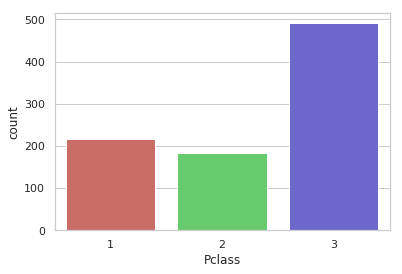

<Figure size 432x288 with 0 Axes>

In [27]:
# Pclass Plot
sns.countplot(x = 'Pclass', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot Pclass')

In [28]:
# Percentage of survival by Pclass:
pclass = df.groupby(['Pclass', 'Survived'])
pclass_count = pclass['Pclass'].count().unstack()
pclass_count 

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


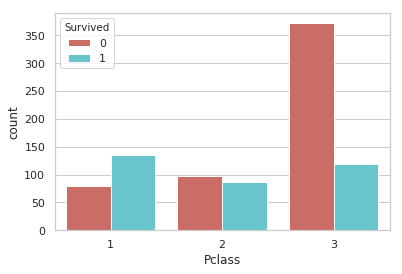

<Figure size 432x288 with 0 Axes>

In [29]:
# Survival plot by Pclass:
sns.countplot(x = 'Pclass',hue = 'Survived', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot Pclass count')

In [30]:
# Observation:
# First class has a slightly higher rate of surviving
# Second class has relatively same rate of surviving and not surviving
# Third class has a significantly higher rate of not surviving rate
# Class affect survival rate

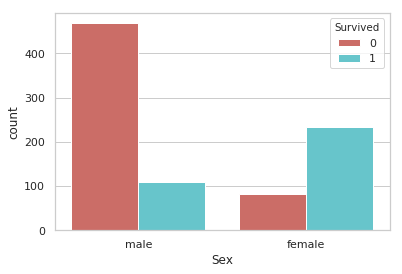

<Figure size 432x288 with 0 Axes>

In [31]:
# Gender data exploration
sns.countplot(x = 'Sex',hue = 'Survived', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot Gender')

In [32]:
# Male has a much higher percentage of not surviving. That might also be because there are many of 3rd class who are male 
# Thus, the high non-survival rate among male might be related to the class, not mainly because they are male??? 
# Still gender is a factor in the model

In [33]:
# Explore correlation between gender and Pclass ( will be implemented after exploration of the remaining features in the model)

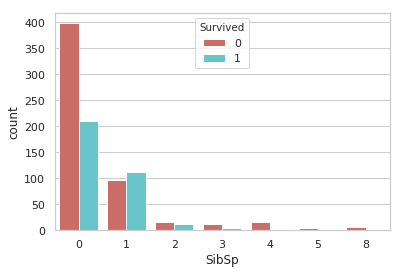

<Figure size 432x288 with 0 Axes>

In [34]:
# Sibling-spouse data exploration
sns.countplot(x = 'SibSp', hue = 'Survived', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot Sibling-Spouse')

In [35]:
# Most people travel without sibling or spouse and among those, there is a high percentage of non-survival
# Again, this might be due to the fact that they are 3rd class male traveler who are on-board alone and work there
# SibSp might help explain the model, keep this feature

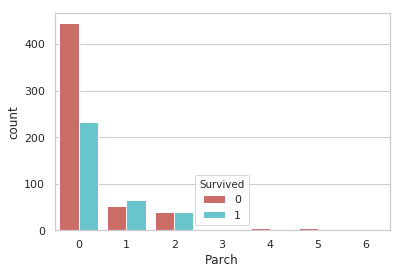

<Figure size 432x288 with 0 Axes>

In [36]:
# Parents- children data exploration
sns.countplot(x = 'Parch', hue = 'Survived', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot Parent_children')

In [37]:
# Same pattern with Sibling- spouse, most people travel without parents/ children. 
# Those traveling without have very high percentage of non-survival. Once we put SibSpouse and Parch
# into the model, we can expect multi-colinearity. 
# I hypothsize that these two variables also correlate with Pclass  

In [38]:
# From the heatmap above, we see that Parch and SibSp are positively correlated,
# Although they are not independent, the correlation is not too high
# Parch seems to have almost no correlation with Survived, so we will keep SibSp and drop Parch

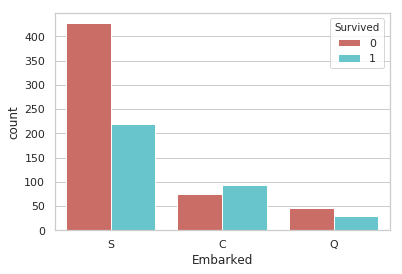

<Figure size 432x288 with 0 Axes>

In [39]:
# Embarked data
sns.countplot(x = 'Embarked', hue = 'Survived', data =  df, palette = 'hls')
plt.show()
plt.savefig('count_plot Embarked')

In [40]:
# S and Q have higher non-survival rate: maybe that's where 3rd class people embark
# C have higher survival rate, maybe that's where more 1st class people embark
# In general, Embark might have effect on Survival 

In [41]:
# With Cabin dropped, we have the remaining features
df= df.drop(['Cabin'], axis = 1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [42]:
# Transform categorical variables
# Although Pclass, SibSp and Parch are represented in number,
# These numbers don't necessarily implies Pclass 1 is one unit bigger than Pclass 2. 
# Having 2 sibblings/spouses/parent is 1 unit more compared to having just 1 sibbling/spouse/parent. 
# But having no sibling and having a few or many siblings may put people in different categories 
# as shown from the exploration of these features above
# Therefore, we will consider Pclass, SibSp, Parch to be categorical 

In [43]:
# Create dummy variables for train set 
category_vars= ['Pclass','Sex','SibSp','Parch','Embarked']
df = pd.get_dummies(df, columns = category_vars, drop_first = True)

In [44]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [45]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)

In [47]:
LogReg = LogisticRegression()

In [48]:
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_predict = LogReg.predict(X_test)

In [50]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[139,  21],
       [ 37,  71]])

In [51]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       160
          1       0.77      0.66      0.71       108

avg / total       0.78      0.78      0.78       268

